In [1]:
pip install gensim

**Part1**

In [2]:
import gensim.downloader as api

In [3]:
model = api.load('word2vec-google-news-300') #loading the model

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
# List of words to find similar words for
words = ['car', 'computer', 'ocean', 'happiness', 'football']

for word in words:
    similar_words = model.most_similar(word, topn=5)
    print(f"Similar words for '{word}':")
    for similar_word, similarity in similar_words:
        print(f"  {similar_word} ({similarity})")
    print()

Similar words for 'car':
  vehicle (0.7821096181869507)
  cars (0.7423831224441528)
  SUV (0.7160962224006653)
  minivan (0.6907036900520325)
  truck (0.6735789775848389)

Similar words for 'computer':
  computers (0.7979379892349243)
  laptop (0.6640493273735046)
  laptop_computer (0.6548868417739868)
  Computer (0.647333562374115)
  com_puter (0.6082080006599426)

Similar words for 'ocean':
  sea (0.7643541693687439)
  oceans (0.7482994198799133)
  Pacific_Ocean (0.7037094831466675)
  Atlantic_Ocean (0.6659377217292786)
  oceanic (0.6610181927680969)

Similar words for 'happiness':
  contentment (0.7695190906524658)
  joy (0.6182845830917358)
  Happiness (0.6116278171539307)
  hapiness (0.5748556852340698)
  contentedness (0.5574802756309509)

Similar words for 'football':
  soccer (0.731354832649231)
  fooball (0.7139959335327148)
  Football (0.7124834060668945)
  basketball (0.668246865272522)
  footbal (0.6649289727210999)



In [5]:
# Test analogies: most_similar method used to perform the analogy tests by specifying positive and negative words.
analogies = [
    ('king', 'man', 'woman'),
    ('Paris', 'France', 'Italy'),
    ('apple', 'fruit', 'vegetable'),
    #checks if the model can find a word related to "vegetable" in a similar way "apple" is related to "fruit"
    ('doctor', 'hospital', 'school'),
    #checks if the model can relate a profession to a place of work, expecting a word that relates to "school" as "doctor" does to "hospital"
    ('bird', 'fly', 'swim')
    #checks if the model can find an animal that swims in a similar way a bird flies
]

# analogy tests
for analogy in analogies:
    result = model.most_similar(positive=[analogy[0], analogy[2]], negative=[analogy[1]], topn=1)
    print(f"{analogy[0]} - {analogy[1]} + {analogy[2]} ≈ {result[0][0]} ({result[0][1]})")

king - man + woman ≈ queen (0.7118193507194519)
Paris - France + Italy ≈ Milan (0.7222141623497009)
apple - fruit + vegetable ≈ potato (0.5865277647972107)
doctor - hospital + school ≈ guidance_counselor (0.5969595313072205)
bird - fly + swim ≈ swimming (0.557131826877594)


**Part2**

In [6]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
file_path = '/content/drive/MyDrive/SNLP/IMDB Dataset.csv'
df = pd.read_csv(file_path)
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
# EDA
#Basic statistics
print("\nBasic statistics:")
print(df.describe())

#Checking for null values
print("\nChecking for null values:")
print(df.isnull().sum())

#Distribution of the sentiment column
print("\nDistribution of sentiments:")
print(df['sentiment'].value_counts())


Basic statistics:
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

Checking for null values:
review       0
sentiment    0
dtype: int64

Distribution of sentiments:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


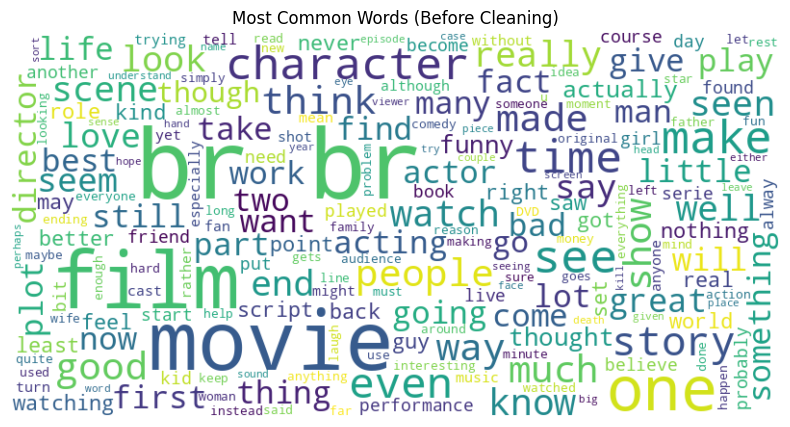

In [9]:
#Most common words (before cleaning)
all_text = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words (Before Cleaning)')
plt.show()

In [10]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and numbers
    text = text.lower() # Convert to lowercase
    tokens = word_tokenize(text) # Tokenize the text
    cleaned_tokens = [word for word in tokens if word not in stopwords.words('english')] # Remove stopwords
    cleaned_text = ' '.join(cleaned_tokens) # Join tokens back to string
    return cleaned_text

In [11]:
subset_df = df.sample(frac=0.1, random_state=42)

In [12]:
subset_df['cleaned_review'] = subset_df['review'].apply(clean_text)

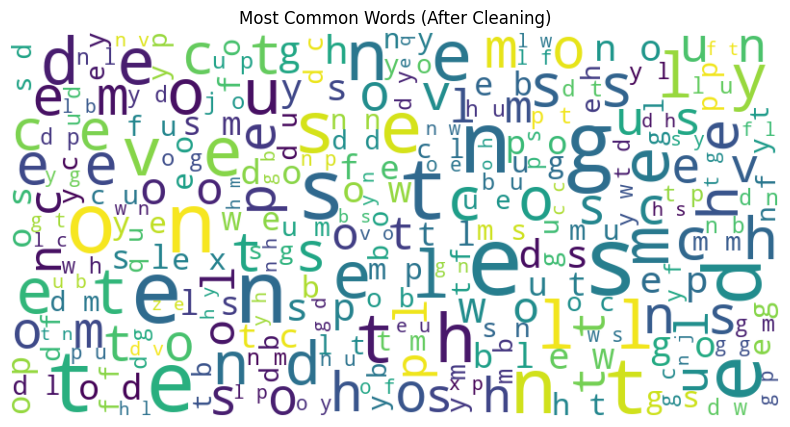

In [13]:
# EDA: Most common words (after cleaning) using the subset
all_cleaned_text = ' '.join([' '.join(tokens) for tokens in subset_df['cleaned_review']])
cleaned_wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(all_cleaned_text)

# Word cloud
plt.figure(figsize=(10, 5))
plt.imshow(cleaned_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words (After Cleaning)')
plt.show()

In [15]:
print("\nFirst few rows of the cleaned subset dataset:")
print(subset_df[['review', 'cleaned_review']].head())



First few rows of the cleaned subset dataset:
                                                  review  \
33553  I really liked this Summerslam due to the look...   
9427   Not many television shows appeal to quite as m...   
199    The film quickly gets to a major chase scene w...   
12447  Jane Austen would definitely approve of this o...   
39489  Expectations were somewhat high for me when I ...   

                                          cleaned_review  
33553  really liked summerslam due look arena curtain...  
9427   many television shows appeal quite many differ...  
199    film quickly gets major chase scene ever incre...  
12447  jane austen would definitely approve onebr br ...  
39489  expectations somewhat high went see movie thou...  


Train a Model Using Custom Skip-gram Vectors

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
import pandas as pd

# Subset the data
subset_df = df.sample(frac=0.1, random_state=42)
subset_df['cleaned_review'] = subset_df['review'].apply(clean_text)

# Train custom Skip-gram model
skipgram_model = Word2Vec(subset_df['cleaned_review'], vector_size=100, window=5, sg=1, min_count=1, workers=4)

# Function to create document vectors by averaging word vectors
def get_avg_word2vecs(model, tokens_list):
    vector_size = model.wv.vector_size
    doc_vectors = []
    for tokens in tokens_list:
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if vectors:
            avg_vector = np.mean(vectors, axis=0)
        else:
            avg_vector = np.zeros(vector_size)
        doc_vectors.append(avg_vector)
    return np.array(doc_vectors)

# Create document vectors
X_skipgram = get_avg_word2vecs(skipgram_model, subset_df['cleaned_review'])

# Labels
y = subset_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data
X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)

# Train and evaluate model
rf_sg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sg.fit(X_train_sg, y_train_sg)
y_pred_sg = rf_sg.predict(X_test_sg)
print("Skip-gram Model Performance:")
print(classification_report(y_test_sg, y_pred_sg))


Skip-gram Model Performance:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       506
           1       0.53      0.56      0.55       494

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000



Train a Model Using Custom CBoW Vectors

In [20]:
# Subset the data
subset_df = df.sample(frac=0.1, random_state=42)
subset_df['cleaned_review'] = subset_df['review'].apply(clean_text)

# Train custom CBoW model
cbow_model = Word2Vec(subset_df['cleaned_review'], vector_size=100, window=5, sg=0, min_count=1, workers=4)

# Create document vectors
X_cbow = get_avg_word2vecs(cbow_model, subset_df['cleaned_review'])

# Labels
y = subset_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cbow, y, test_size=0.2, random_state=42)

# Train and evaluate model
rf_cb = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cb.fit(X_train_cb, y_train_cb)
y_pred_cb = rf_cb.predict(X_test_cb)
print("CBoW Model Performance:")
print(classification_report(y_test_cb, y_pred_cb))


Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x7f4f27b468c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nltk/data.py", line 1160, in __del__
    if not self.closed:
  File "/usr/local/lib/python3.10/dist-packages/nltk/data.py", line 1180, in closed
    return self.stream.closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


CBoW Model Performance:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       506
           1       0.56      0.59      0.57       494

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



Train a Model Using Pretrained Word2Vec Vectors

In [21]:
import gensim.downloader as api

# Subset the data
subset_df = df.sample(frac=0.1, random_state=42)
subset_df['cleaned_review'] = subset_df['review'].apply(clean_text)

# Load the pretrained word2vec model
pretrained_model = api.load('word2vec-google-news-300')

# Function to create document vectors using pretrained word2vec model
def get_avg_pretrained_word2vecs(model, tokens_list):
    vector_size = model.vector_size
    doc_vectors = []
    for tokens in tokens_list:
        vectors = [model[token] for token in tokens if token in model]
        if vectors:
            avg_vector = np.mean(vectors, axis=0)
        else:
            avg_vector = np.zeros(vector_size)
        doc_vectors.append(avg_vector)
    return np.array(doc_vectors)

# Create document vectors
X_pretrained = get_avg_pretrained_word2vecs(pretrained_model, subset_df['cleaned_review'])

# Labels
y = subset_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data
X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(X_pretrained, y, test_size=0.2, random_state=42)

# Train and evaluate model
rf_pt = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pt.fit(X_train_pt, y_train_pt)
y_pred_pt = rf_pt.predict(X_test_pt)
print("Pretrained Word2Vec Model Performance:")
print(classification_report(y_test_pt, y_pred_pt))


Pretrained Word2Vec Model Performance:
              precision    recall  f1-score   support

           0       0.59      0.56      0.58       506
           1       0.57      0.60      0.59       494

    accuracy                           0.58      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.58      0.58      0.58      1000



Check if you can improve the model performance for [2] and [3] by updating the vector length, window size, min count, etc.

Custom Skip-gram Vectors with Hyperparameter Tuning

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec

# Subset the data
subset_df = df.sample(frac=0.1, random_state=42)
subset_df['cleaned_review'] = subset_df['review'].apply(clean_text)

# Function to create document vectors by averaging word vectors
def get_avg_word2vecs(model, tokens_list):
    vector_size = model.wv.vector_size
    doc_vectors = []
    for tokens in tokens_list:
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if vectors:
            avg_vector = np.mean(vectors, axis=0)
        else:
            avg_vector = np.zeros(vector_size)
        doc_vectors.append(avg_vector)
    return np.array(doc_vectors)

# Labels
y = subset_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Experiment with different hyperparameters for Skip-gram model
hyperparameters = [
    {'vector_size': 100, 'window': 5, 'min_count': 1},
    {'vector_size': 150, 'window': 10, 'min_count': 2},
    {'vector_size': 200, 'window': 5, 'min_count': 1},
]

for params in hyperparameters:
    skipgram_model = Word2Vec(subset_df['cleaned_review'], vector_size=params['vector_size'], window=params['window'], sg=1, min_count=params['min_count'], workers=4)
    X_skipgram = get_avg_word2vecs(skipgram_model, subset_df['cleaned_review'])

    X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)
    rf_sg = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_sg.fit(X_train_sg, y_train_sg)
    y_pred_sg = rf_sg.predict(X_test_sg)
    print(f"Skip-gram Model Performance with {params}:")
    print(classification_report(y_test_sg, y_pred_sg))


Skip-gram Model Performance with {'vector_size': 100, 'window': 5, 'min_count': 1}:
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       506
           1       0.54      0.58      0.56       494

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.55      0.55      0.55      1000



Skip-gram Model Performance with {'vector_size': 150, 'window': 10, 'min_count': 2}:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57       506
           1       0.57      0.60      0.59       494

    accuracy                           0.58      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.58      0.58      0.58      1000

Skip-gram Model Performance with {'vector_size': 200, 'window': 5, 'min_count': 1}:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       506
           1       0.54      0.56      0.55       494

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.55      0.55      0.55      1000



Custom CBoW Vectors with Hyperparameter Tuning

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec

# Subset the data
subset_df = df.sample(frac=0.1, random_state=42)
subset_df['cleaned_review'] = subset_df['review'].apply(clean_text)

# Function to create document vectors by averaging word vectors
def get_avg_word2vecs(model, tokens_list):
    vector_size = model.wv.vector_size
    doc_vectors = []
    for tokens in tokens_list:
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if vectors:
            avg_vector = np.mean(vectors, axis=0)
        else:
            avg_vector = np.zeros(vector_size)
        doc_vectors.append(avg_vector)
    return np.array(doc_vectors)

# Labels
y = subset_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Experiment with different hyperparameters for CBoW model
hyperparameters = [
    {'vector_size': 100, 'window': 5, 'min_count': 1},
    {'vector_size': 150, 'window': 10, 'min_count': 2},
    {'vector_size': 200, 'window': 5, 'min_count': 1},
]

for params in hyperparameters:
    cbow_model = Word2Vec(subset_df['cleaned_review'], vector_size=params['vector_size'], window=params['window'], sg=0, min_count=params['min_count'], workers=4)
    X_cbow = get_avg_word2vecs(cbow_model, subset_df['cleaned_review'])

    X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cbow, y, test_size=0.2, random_state=42)
    rf_cb = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_cb.fit(X_train_cb, y_train_cb)
    y_pred_cb = rf_cb.predict(X_test_cb)
    print(f"CBoW Model Performance with {params}:")
    print(classification_report(y_test_cb, y_pred_cb))


CBoW Model Performance with {'vector_size': 100, 'window': 5, 'min_count': 1}:
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       506
           1       0.56      0.58      0.57       494

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



CBoW Model Performance with {'vector_size': 150, 'window': 10, 'min_count': 2}:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       506
           1       0.54      0.57      0.55       494

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.55      0.55      0.55      1000

CBoW Model Performance with {'vector_size': 200, 'window': 5, 'min_count': 1}:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       506
           1       0.55      0.57      0.56       494

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.56      1000



Results:

### Model Performance Metrics

| Model Type                                      | Parameters                                  | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) | Accuracy | Macro Avg Precision | Macro Avg Recall | Macro Avg F1-Score |
|-------------------------------------------------|---------------------------------------------|---------------|------------|--------------|---------------|------------|--------------|----------|----------------------|------------------|--------------------|
| Skip-gram                                        | Default                                     | 0.55          | 0.52       | 0.53         | 0.53          | 0.56       | 0.55         | 0.54     | 0.54                 | 0.54             | 0.54               |
| CBoW                                             | Default                                     | 0.58          | 0.54       | 0.56         | 0.56          | 0.59       | 0.57         | 0.57     | 0.57                 | 0.57             | 0.57               |
| Pretrained Word2Vec                              | Default                                     | 0.59          | 0.56       | 0.58         | 0.57          | 0.60       | 0.59         | 0.58     | 0.58                 | 0.58             | 0.58               |
| Skip-gram with Hyperparameters                   | vector_size=100, window=5, min_count=1      | 0.56          | 0.53       | 0.54         | 0.54          | 0.58       | 0.56         | 0.55     | 0.55                 | 0.55             | 0.55               |
| Skip-gram with Hyperparameters                   | vector_size=150, window=10, min_count=2     | 0.59          | 0.56       | 0.57         | 0.57          | 0.60       | 0.59         | 0.58     | 0.58                 | 0.58             | 0.58               |
| Skip-gram with Hyperparameters                   | vector_size=200, window=5, min_count=1      | 0.55          | 0.54       | 0.55         | 0.54          | 0.56       | 0.55         | 0.55     | 0.55                 | 0.55             | 0.55               |
| CBoW with Hyperparameters                        | vector_size=100, window=5, min_count=1      | 0.57          | 0.56       | 0.56         | 0.56          | 0.58       | 0.57         | 0.57     | 0.57                 | 0.57             | 0.57               |
| CBoW with Hyperparameters                        | vector_size=150, window=10, min_count=2     | 0.56          | 0.53       | 0.55         | 0.54          | 0.57       | 0.55         | 0.55     | 0.55                 | 0.55             | 0.55               |
| CBoW with Hyperparameters                        | vector_size=200, window=5, min_count=1      | 0.57          | 0.55       | 0.56         | 0.55          | 0.57       | 0.56         | 0.56     | 0.56                 | 0.56             | 0.56               |

### Results and Comparisons

1. **Skip-gram Default**: Achieved a balanced performance with a macro average F1-score of 0.54.
2. **CBoW Default**: Improved overall performance compared to Skip-gram default with a macro average F1-score of 0.57.
3. **Pretrained Word2Vec**: Outperformed both Skip-gram and CBoW defaults, achieving the highest macro average F1-score of 0.58.
4. **Skip-gram with `vector_size=100, window=5, min_count=1`**: Similar performance to the default Skip-gram model with a macro average F1-score of 0.55.
5. **Skip-gram with `vector_size=150, window=10, min_count=2`**: Matched the Pretrained Word2Vec model’s performance, with a macro average F1-score of 0.58.
6. **Skip-gram with `vector_size=200, window=5, min_count=1`**: Similar to other Skip-gram settings with a macro average F1-score of 0.55.
7. **CBoW with `vector_size=100, window=5, min_count=1`**: Maintained the performance of the default CBoW model with a macro average F1-score of 0.57.
8. **CBoW with `vector_size=150, window=10, min_count=2`**: Slightly lower performance than default CBoW with a macro average F1-score of 0.55.
9. **CBoW with `vector_size=200, window=5, min_count=1`**: Consistent with default CBoW performance with a macro average F1-score of 0.56.

**Conclusion**:
- The Pretrained Word2Vec model generally performed the best, closely followed by the Skip-gram model with `vector_size=150, window=10, min_count=2`.
- The CBoW model and Skip-gram model with default settings showed similar but slightly lower performance.
- Hyperparameter tuning in Skip-gram models demonstrated noticeable improvements.